In [ ]:
# prompt: I want to link drive file dataset with notebook

from google.colab import drive
drive.mount('/content/drive')
#Now you can access your files in drive like this:
# /content/drive/MyDrive/....
#Example:
#import pandas as pd
#df = pd.read_csv('/content/drive/MyDrive/your_file.csv')
#print(df.head())


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [ ]:
# prompt: I want to unzip a file named archive from the drivee

import zipfile
import os

# Specify the path to your zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/archive.zip'  # Replace with your actual file path

# Specify the directory where you want to extract the files
extract_dir = '/content/drive/MyDrive/extracted_archive' # Replace with your desired extract directory

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")

except FileNotFoundError:
    print(f"Error: File '{zip_file_path}' not found.")
except zipfile.BadZipFile:
    print(f"Error: '{zip_file_path}' is not a valid zip file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully extracted '/content/drive/MyDrive/archive.zip' to '/content/drive/MyDrive/extracted_archive'


In [2]:
import keras
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import math
import sklearn

In [3]:
# Define the ImageDataGenerator instance without rotation for arrow images
datagen = ImageDataGenerator(
    # rescale=1./255,
    rotation_range=0,       # No rotation to preserve direction
    # width_shift_range=0.05,  # Small shifts
    # height_shift_range=0.05,
    # shear_range=0.1,         # Minimal shear
    # zoom_range=0.05,          # Minimal zoom
    horizontal_flip=False,   # Disable if flipping causes confusion
    fill_mode='nearest',
    validation_split=0.2
)


# Training data generator for two classes: right and left
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/extracted_archive/Direction',  # Directory with training images
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',  # Binary classification
    shuffle=True,
    subset='training'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/extracted_archive/Direction',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',  # Binary classification
    shuffle=False,
    subset='validation'
)


Found 1474 images belonging to 2 classes.
Found 368 images belonging to 2 classes.


In [4]:
train_generator.class_indices

{'Left': 0, 'Right': 1}

In [5]:
type(train_generator)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [6]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [7]:
images,labels=next(train_generator)
images.shape


(32, 64, 64, 3)

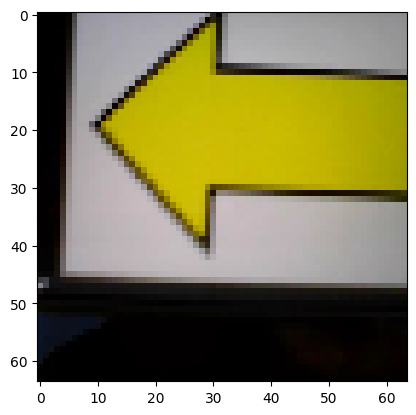

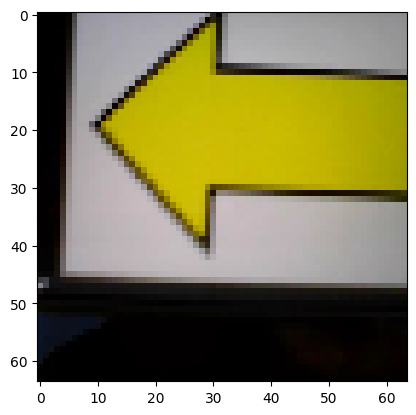

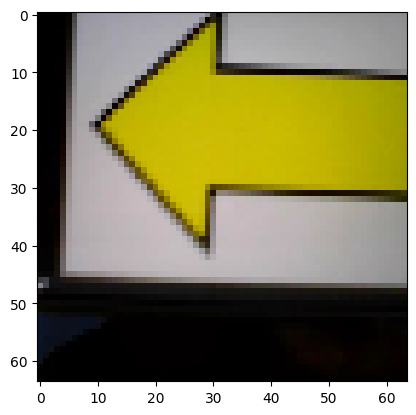

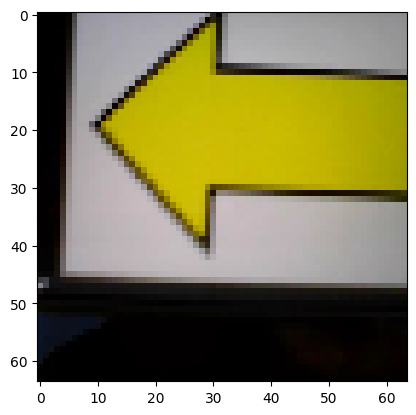

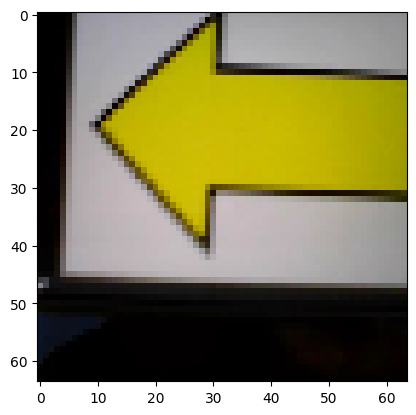

In [8]:
# Load a single image to visualize augmentations
import tensorflow as tf
import matplotlib.pyplot as plt
img_path = '/content/drive/MyDrive/extracted_archive/Direction/Left/0.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# Generate augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 5 == 0:  # Display 5 images
        break

plt.show()

In [9]:
import matplotlib.pyplot as plt

def plot_augmented_images(images, labels, num_images=5):
    """
    Plots a grid of augmented images with their corresponding labels.

    Parameters:
    images (numpy.ndarray): Array of images to be plotted.
    labels (numpy.ndarray): Array of labels corresponding to the images.
    num_images (int): Number of images to display.
    """
    plt.figure(figsize=(10, 10))

    for i in range(min(num_images, len(images))):  # Ensure we don't exceed available images
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].astype('uint8'))  # Display image
        plt.title(f'Label: {labels[i]}')  # Show the corresponding label
        plt.axis('off')  # Hide axis

    plt.show()


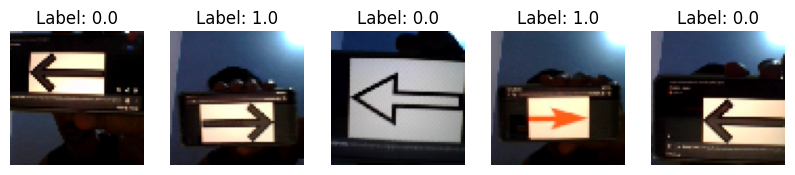

In [10]:
# Assume 'images' and 'labels' are obtained from your data generator
images, labels = next(train_generator)  # Get a batch of images and labels
plot_augmented_images(images, labels, num_images=5)  # Display 5 images


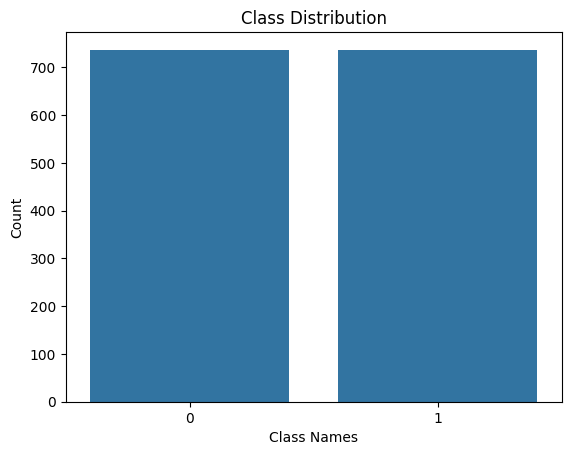

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure `labels` is defined correctly
labels = train_generator.classes  # Get the class indices for each image

# Plot the class distribution
sns.countplot(x=labels)
plt.title("Class Distribution")
plt.xlabel("Class Names")
plt.ylabel("Count")
plt.show()


In [12]:
import os
from sklearn.preprocessing import LabelEncoder

# Base directory for your dataset
base_dir = '/content/drive/MyDrive/extracted_archive/Direction'
class_names = os.listdir(base_dir)  # Assumes each folder inside 'Direction' is a class

# Initialize lists
images = []
labels = []

# Valid image extensions
valid_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')

# Loop through each class folder and collect file paths and labels
for class_name in class_names:
    class_dir = os.path.join(base_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.lower().endswith(valid_extensions):  # Check for valid image file
            file_path = os.path.join(class_dir, filename)
            images.append(file_path)  # Add image path
            labels.append(class_name)  # Add class name as label

# Ensure images and labels have the same length
assert len(images) == len(labels), "Mismatch between number of images and labels"

# Encode labels if needed
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)  # Convert string labels to numeric


In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Function to load and preprocess an image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))  # Resize to match your model's input shape
    img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]
    return img_array

# Assuming images is a list of image file paths and labels is the corresponding labels
# Split the dataset (example)
from sklearn.model_selection import train_test_split

X_train_paths, X_test_paths, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load and preprocess training images
X_train = np.array([load_and_preprocess_image(img_path) for img_path in X_train_paths])
X_test = np.array([load_and_preprocess_image(img_path) for img_path in X_test_paths])

# Now X_train will contain the actual image data
print(X_train[0])  # This should print the array of the first image


[[[0.27058825 0.3372549  0.44705883]
  [0.28627452 0.31764707 0.47058824]
  [0.24313726 0.31764707 0.44705883]
  ...
  [0.30588236 0.38431373 0.49019608]
  [0.9019608  0.94509804 0.9529412 ]
  [0.99215686 0.99215686 1.        ]]

 [[0.2509804  0.33333334 0.45490196]
  [0.2509804  0.34117648 0.46666667]
  [0.24705882 0.3254902  0.45490196]
  ...
  [0.14509805 0.23137255 0.3254902 ]
  [0.15294118 0.27450982 0.38431373]
  [0.9764706  1.         1.        ]]

 [[0.21568628 0.3019608  0.45490196]
  [0.21176471 0.29803923 0.44313726]
  [0.20784314 0.29803923 0.43137255]
  ...
  [0.10980392 0.18039216 0.26666668]
  [0.09019608 0.1764706  0.26666668]
  [0.2901961  0.3882353  0.46666667]]

 ...

 [[0.04313726 0.04313726 0.04313726]
  [0.04705882 0.04705882 0.05490196]
  [0.04313726 0.05098039 0.03921569]
  ...
  [0.05098039 0.05098039 0.05098039]
  [0.05882353 0.05882353 0.05882353]
  [0.05490196 0.05490196 0.0627451 ]]

 [[0.04313726 0.04313726 0.05098039]
  [0.03921569 0.03921569 0.04705882]


In [15]:
# print(X_train[0])

In [16]:
X_train.shape

(1473, 64, 64, 3)

In [17]:
X_test.shape

(369, 64, 64, 3)

In [18]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Parameters
image_height, image_width = 64, 64  # Specify the target image dimensions
num_classes = 2  # Update for two classes (Left, Right)

# Directory where your images are stored
data_dir = '/content/drive/MyDrive/extracted_archive/Direction'

# Load images and labels
X = []
y = []

# Class names and mapping for Left and Right only
class_names = ['Left', 'Right']
class_mapping = {name: index for index, name in enumerate(class_names)}

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(class_dir, filename)
            # Load and process the image
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_width, image_height))
            img = img / 255.0  # Normalize
            X.append(img)
            y.append(class_mapping[class_name])

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
arrow_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
arrow_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
arrow_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.6624 - loss: 0.6028 - val_accuracy: 0.9458 - val_loss: 0.1542
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 244ms/step - accuracy: 0.9754 - loss: 0.0979 - val_accuracy: 0.9675 - val_loss: 0.0827
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 234ms/step - accuracy: 0.9951 - loss: 0.0316 - val_accuracy: 0.9864 - val_loss: 0.0315
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 172ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.9973 - val_loss: 0.0148
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.9952 - loss: 0.0223 - val_accuracy: 1.0000 - val_loss: 0.0047


In [19]:
# Evaluate the model on the test data
loss, accuracy = arrow_model.evaluate(X_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 1.0000 - loss: 0.0045
Test Loss: 0.0047
Test Accuracy: 1.0000


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


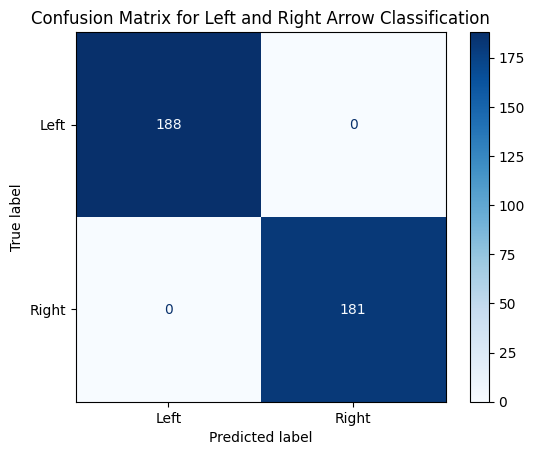

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get model predictions for the test set
y_pred = arrow_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert predictions to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix with updated labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Left', 'Right'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Left and Right Arrow Classification')
plt.show()


In [21]:
# Convert predictions to class labels
y_pred_classes = y_pred.argmax(axis=1)

# Print the first few true labels and predicted labels
for i in range(10):
    print(f"True Label: {y_test[i]}, Predicted Label: {y_pred_classes[i]}")


True Label: 1, Predicted Label: 1
True Label: 1, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 1, Predicted Label: 1
True Label: 1, Predicted Label: 1
True Label: 1, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0


In [22]:
import numpy as np
from sklearn.metrics import classification_report

# Display class distribution in y_test
unique, counts = np.unique(y_test, return_counts=True)
print("Class distribution in y_test:", dict(zip(unique, counts)))

# Convert y_pred to class labels
y_pred_classes = y_pred.argmax(axis=1)

# Calculate the classification report
report = classification_report(y_test, y_pred_classes, zero_division=1)
print("Classification Report:\n", report)


Class distribution in y_test: {0: 188, 1: 181}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       181

    accuracy                           1.00       369
   macro avg       1.00      1.00      1.00       369
weighted avg       1.00      1.00      1.00       369



In [24]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import RMSprop

# Define input tensor
input_tensor = Input(shape=(64, 64, 3))

# Load the VGG16 model without the top layer
vgg16_base = VGG16(include_top=False, weights="imagenet", input_tensor=input_tensor)

# Freeze initial layers
for layer in vgg16_base.layers[:16]:
    layer.trainable = False

# Unfreeze layers for fine-tuning
for layer in vgg16_base.layers[16:]:
    layer.trainable = True

# Add GlobalAveragePooling2D and Dense layers
x = GlobalAveragePooling2D()(vgg16_base.output)
output_tensor = Dense(units=2, activation='softmax')(x)

# Create the model
vgg16_model = Model(inputs=input_tensor, outputs=output_tensor)

# Display model summary
vgg16_model.summary()

# Define Early Stopping with increased patience
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    min_delta=0.001,
    patience=30,
    restore_best_weights=True,
    verbose=1
)

# Model Checkpoint: Save only if validation accuracy improves
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/best_arrow_model.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Compile the model with a reduced learning rate
vgg16_model.compile(
    optimizer=RMSprop(learning_rate=0.0005),  # Reduced learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
vgg16_history = vgg16_model.fit(
    X_train,
    y_train,
    batch_size=32,  # Smaller batch size
    epochs=15,      # Allow more epochs for gradual improvement
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, checkpoint]
)

# Save the final trained model
vgg16_model.save('/content/drive/MyDrive/arrow_model_final.keras')

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │           1,0

 Total params: 14,715,714 (56.14 MB)

 Trainable params: 4,720,642 (18.01 MB)

 Non-trainable params: 9,995,072 (38.13 MB)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6236 - loss: 1.5925
Epoch 1: val_accuracy improved from -inf to 0.65312, saving model to /content/drive/MyDrive/best_arrow_model.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.6259 - loss: 1.5763 - val_accuracy: 0.6531 - val_loss: 0.4703
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9242 - loss: 0.1962
Epoch 2: val_accuracy improved from 0.65312 to 1.00000, saving model to /content/drive/MyDrive/best_arrow_model.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9247 - loss: 0.1951 - val_accuracy: 1.0000 - val_loss: 0.0170
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9794 - loss: 0.0903
Epoch 3: val_accuracy did not improve from 1.00000
47/47 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9795 - loss: 0.0899 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9932 - loss: 0.0365
Epoch 4: val_accuracy did not improv

In [ ]:
import tensorflow
from keras.models import load_model
model = load_model('/content/drive/MyDrive/arrow_model.keras')

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Load your trained model
model = load_model('/content/drive/MyDrive/arrow_model.keras')

# Define the mapping for model class predictions
arrow_classes = {0: 'Left', 1: 'Right'}

# Open a connection to the webcam (0 is usually the default camera)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame for prediction
    frame_resized = cv2.resize(frame, (64, 64))
    frame_array = np.expand_dims(frame_resized, axis=0)  # Shape to (1, 64, 64, 3)
    frame_array = frame_array / 255.0  # Normalize the image as during training

    # Debugging: Check input shape
    print(f"Model expects input shape: {model.input_shape}")
    print(f"Provided input shape: {frame_array.shape}")

    # Make predictions
    predictions = model.predict(frame_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = predictions[0][predicted_class]  # Get confidence for the detected class

    # Display only if an arrow is detected with high confidence (e.g., confidence > 0.8)
    if confidence > 0.8:
        arrow_direction = arrow_classes[predicted_class]
        message = f"{arrow_direction} detected"

        # Overlay the message on the frame
        cv2.putText(frame, message, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show the frame
    cv2.imshow('Arrow Detection', frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


In [ ]:
# Run this cell to capture a webcam photo
from IPython.display import display, Javascript
from google.colab.output import eval_js
from PIL import Image
import io
import cv2
import numpy as np
import base64  # Import the base64 module


def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to be the same size as the video element
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => setTimeout(resolve, 1000));

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = io.BytesIO(base64.b64decode(data.split(',')[1]))
    img = Image.open(binary)
    img.save(filename)
    return filename

# Capture and save the photo
filename = take_photo()
print("Saved to", filename)



<IPython.core.display.Javascript object>

Saved to photo.jpg


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Assuming `vgg16_model` is your trained model in the notebook

# Define the class dictionary for arrow direction
class_labels = {0: 'Left', 1: 'Right'}

# Load an image file for testing
img_path = '/content/photo.jpg'
img = image.load_img(img_path, target_size=(64, 64))  # Adjust size as per your model's input

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand dimensions to match the model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image if your model requires it
img_array = img_array / 255.0  # Example normalization, adjust if needed

# Get the prediction
prediction = vgg16_model.predict(img_array)

# Print the prediction probabilities to understand its structure
print("Prediction probabilities:", prediction)

# Get the index of the class with the highest probability
predicted_class = np.argmax(prediction[0])

# Map the predicted class index to the corresponding direction label
predicted_label = class_labels[predicted_class]
print(f"The image is classified as: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction probabilities: [[1.1898863e-04 9.9988103e-01]]
The image is classified as: Right


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model("/content/drive/MyDrive/arrow_model.keras")

# Capture video from webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess frame for prediction
    img = cv2.resize(frame, (64, 64))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict
    predictions = model.predict(img)
    class_idx = np.argmax(predictions)
    confidence = predictions[0][class_idx]

    # Output based on prediction
    if confidence > 0.8:  # Confidence threshold
        if class_idx == 0:
            output_text = "Left Arrow Detected"
        else:
            output_text = "Right Arrow Detected"
    else:
        output_text = "No Arrow Detected"

    # Overlay the output text on the frame
    cv2.putText(frame, output_text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show the frame
    cv2.imshow("Arrow Detection", frame)

    # Break on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()
